In [3]:
import numpy as np 
import random
import networkx as nx
import matplotlib.pyplot as plt
import time 

In [6]:


def nNumber(G,r,step):
    n=len(G)
    z=n
    t=0
    M_array=np.zeros(step)
    M={random.randint(0,n-1)}
    D={j for j in range(0,n)}
    R=D-M;u=0
    while u<step:
        i=len(M)     
        k=random.random()
        pi_neg=(n-i)/((n-i)+(i*r))
        pi_pos=(i*r)/((n-i)+(i*r))
        pii=1-(pi_neg+pi_pos)
        if k<(1-pii) and i!=0  :

        
            if k<pi_pos:  ###probabililty for a mutant to reproduce
                ch=random.sample(M,1)
                NE=[n for n in G.neighbors(ch[0])]
                chh=random.sample(NE,1)
                if chh[0]  in R:
                    M.add(chh[0])
                    R.remove(chh[0])
                    t+=1

            else:   ###of course when p <(1-pii) and >pi_pos so this is obvious this is for a mutant to die lonely
                chre=random.sample(R,1)
                NEre=[n for n in G.neighbors(chre[0])]
                chhre=random.sample(NEre,1)
                if chhre[0]  in M:
                    R.add(chhre[0])
                    M.remove(chhre[0])
                    t+=1
        M_array[u]=len(M)/n
        u=u+1
            
    return(t,M_array)

In [7]:
def addedge(G):  ###for connecting degrees=1
    a=nx.adjacency_matrix(G).toarray()
    degree=np.sum(a,axis=0)
    v=np.nonzero(degree==1)[0] ##identifying deg=1 vertices
   
    def chk(choice):
        if choice[0]!=choice[1]:
            return True
        else:
            return False
        
    
    choice=np.random.choice(v,2)
    while chk(choice)==False :
        choice=np.random.choice(v,2)
    
    a[choice[0]][choice[1]]=1;a[choice[1]][choice[0]]

    G_new=nx.from_numpy_matrix(a,create_using=nx.Graph())
    
    return G_new



def check_stability(mm):
    c=False
    if mm[-1]==1 or mm[-1]==0:
        c=True
    return c

In [8]:
t1=time.time()
num=300
step=100000
size=500
r=3
start=750;end=1000
no_graph=np.arange(start,end)
fix_time_total=[]
ext_time_total=[]
#G_tot=[];
#M=[]
for j in (no_graph):
    mm=[]
    #mm=np.zeros(num*step)
    fix_time=[];ext_time=[]

    A=np.loadtxt('G'+str(j)+'.txt')    
    G=nx.from_numpy_array(A,create_using=nx.Graph())  

    for h in range (num):
        #print('h=',h)

        t,m=nNumber(G,r,step)
        
        if check_stability(m)==False:
            print('num=', h)
            print('no=', j)
        
        #mm[0:step]=m
        mm.append(m)
        if m[-1]==1:
            for tt in range (len(m)):
                if m[tt]==m[-1]:
                    fix_time.append(tt)
                    break
            
        elif m[-1]==0:
            for tt in range (len(m)):
                if m[tt]==m[-1]:
                    ext_time.append(tt)
                    break
    M_avg=mm[0]                      
    for muts in mm[1:]:
        M_avg=muts+M_avg
    M_avg=M_avg/num
    np.savetxt('M_avg'+str(j)+'.dat',M_avg)
    np.savetxt('fixtime_r3_'+str(j)+'.dat',np.array(fix_time))
    np.savetxt('exttime_r3_'+str(j)+'.dat',np.array(ext_time))
    #M.append(mm)
    
#np.savetxt('fixation'+str(start)+'-'+str(end)+'.dat',fix_time_total)
#np.savetxt('extinction'+str(start)+'-'+str(end)+'.dat',ext_time_total)
t2=time.time()

/tmp/ipykernel_175718/3074412905.py:28: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  chre=random.sample(R,1)
/tmp/ipykernel_175718/3074412905.py:19: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ch=random.sample(M,1)


KeyboardInterrupt: 

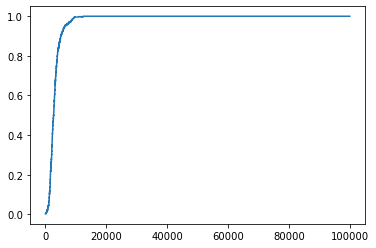

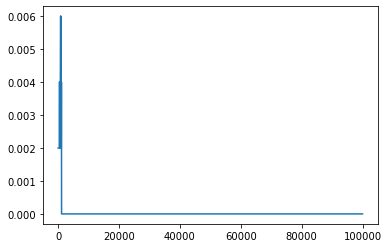

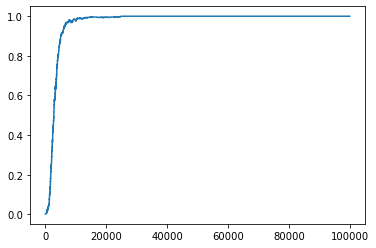

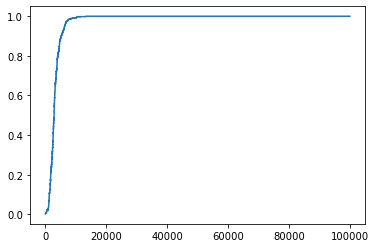

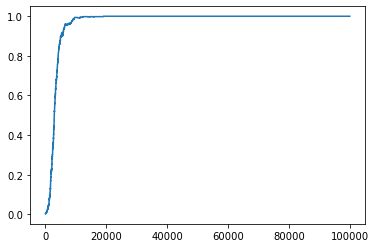

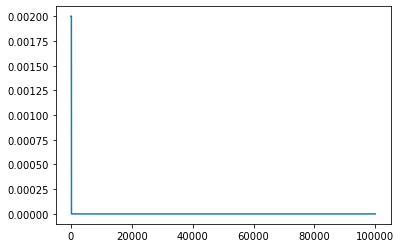

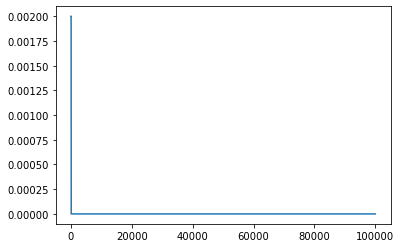

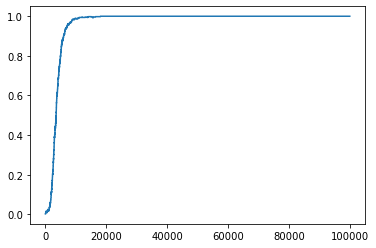

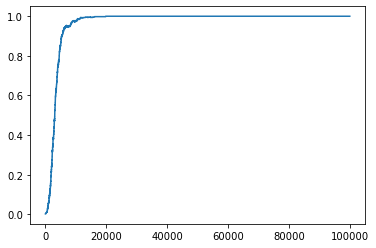

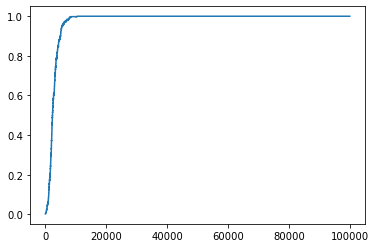

In [12]:
for k in range(10):
    plt.plot(M[0][k])
    plt.show()

In [25]:
print(t2-t1)

47913.43322610855


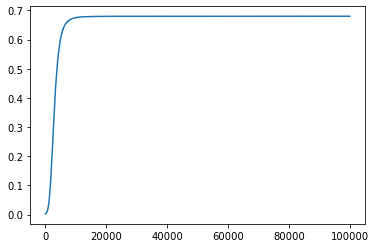

In [26]:
plt.plot(M_avg)

In [31]:
mean3=[]
for q in fix_time_total:
    mean3.append(np.sum(q)/len(q))
np.savetxt('qmean3-750-1000.txt',mean3)

In [4]:
q1=np.loadtxt('fmean3-0-250.txt')
q2=np.loadtxt('fmean3-250-500.txt')
q3=np.loadtxt('fmean3-500-750.txt')
q4=np.loadtxt('fmean3-750-1000.txt')

/tmp/ipykernel_206491/1759016155.py:1: UserWarning: loadtxt: Empty input file: "fmean3-0-250.txt"
  q1=np.loadtxt('fmean3-0-250.txt')
/tmp/ipykernel_206491/1759016155.py:2: UserWarning: loadtxt: Empty input file: "fmean3-250-500.txt"
  q2=np.loadtxt('fmean3-250-500.txt')
/tmp/ipykernel_206491/1759016155.py:3: UserWarning: loadtxt: Empty input file: "fmean3-500-750.txt"
  q3=np.loadtxt('fmean3-500-750.txt')
/tmp/ipykernel_206491/1759016155.py:4: UserWarning: loadtxt: Empty input file: "fmean3-750-1000.txt"
  q4=np.loadtxt('fmean3-750-1000.txt')


In [33]:
len(fix_time_total)

0

In [34]:
len(fix_time)

204

In [35]:
len(ext_time)

96

In [5]:
test_fix=[]
for i in range (1000):
    test_fix.append(np.loadtxt('fixtime_r3_'+str(i)+'.dat'))

In [6]:
len(test_fix[0])

211

In [7]:
f3_mean=[]
for f in test_fix:
    f3_mean.append(np.sum(f)/len(f))

In [8]:
len(f3_mean)

1000

Text(0, 0.5, 'fixation time_r3')

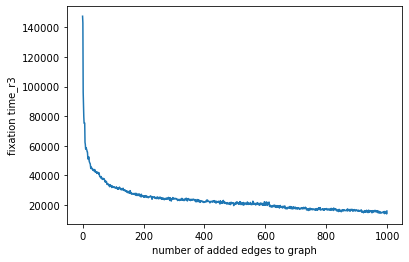

In [9]:
plt.plot(f3_mean)
plt.xlabel('number of added edges to graph');plt.ylabel('fixation time_r3')

In [10]:
f3_mean

[147452.17535545025,
 142917.96208530807,
 96202.44549763034,
 87916.69483568076,
 79623.74509803922,
 75270.38888888889,
 75305.10328638498,
 75436.69035532995,
 62349.18348623853,
 60994.01442307692,
 57998.692307692305,
 57737.586854460096,
 58640.89175257732,
 57556.8064516129,
 57201.53431372549,
 56029.99033816425,
 55909.44041450777,
 52682.65048543689,
 51462.78217821782,
 50855.08571428571,
 52621.97129186603,
 51277.83084577115,
 49391.17840375587,
 48741.0,
 48259.70506912442,
 47992.45327102804,
 46502.28217821782,
 44715.08571428571,
 45746.58823529412,
 45236.60368663594,
 45120.98484848485,
 44641.11009174312,
 44095.93969849246,
 44216.42639593909,
 43477.12182741117,
 43548.14027149321,
 43287.89705882353,
 44095.96860986547,
 43384.293023255814,
 42964.41176470588,
 43943.05641025641,
 42421.58293838862,
 42873.92270531401,
 42203.60091743119,
 42405.51256281407,
 42527.30275229358,
 42533.64179104478,
 41364.63981042654,
 42138.42788461538,
 41754.87614678899,
 41518

In [11]:
f3_mean[0]

147452.17535545025

In [13]:
f3_mean[999]

15985.921568627451

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


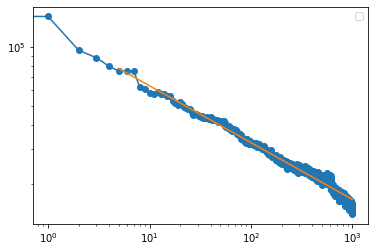

In [45]:
from numpy import arange
from scipy.optimize import curve_fit
plt.loglog(f_mean,'o-')
popt,pcov=curve_fit(lambda x,c,a:c*x**(a),np.arange(0,1000)[5:],f_mean[5:])
plt.plot(np.arange(0,1000)[5:],popt[0]*np.arange(0,1000)[5:]**(popt[1]))
plt.legend()
plt.show()


In [46]:
popt,pcov

(array([ 1.23367235e+05, -2.89564564e-01]),
 array([[ 4.12333521e+05, -6.05236699e-01],
        [-6.05236699e-01,  9.52383134e-07]]))

Text(0, 0.5, 'fixation time-log_r3')

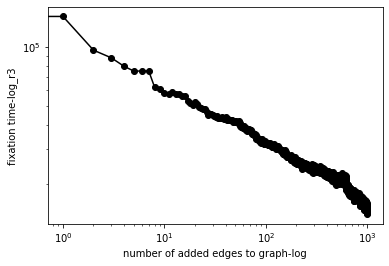

In [52]:
plt.plot(f_mean,'ko-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of added edges to graph-log');plt.ylabel('fixation time-log_r3')

In [15]:
lastm_avg=[]
for i in range (1000):
    M_avg=np.loadtxt('M_avg'+str(i)+'.dat')
    lastm_avg.append(M_avg[-1])

Text(0, 0.5, 'fixation probablity_r3')

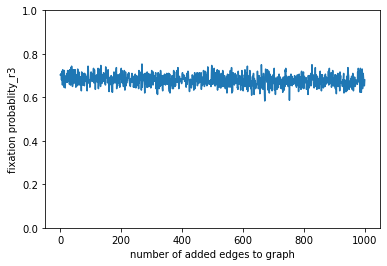

In [48]:
plt.plot(lastm_avg)
plt.ylim(0,1)
plt.xlabel('number of added edges to graph');plt.ylabel('fixation probablity_r3')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


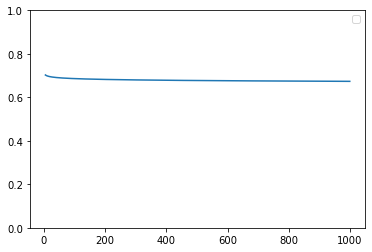

In [34]:
from numpy import arange
from scipy.optimize import curve_fit
#plt.plot(lastm_avg)
popt,pcov=curve_fit(lambda x,c,a:c*x**(a),np.arange(0,1000)[5:],lastm_avg[5:])
plt.plot(np.arange(0,1000)[5:],popt[0]*np.arange(0,1000)[5:]**(popt[1]))
plt.ylim(0,1)
plt.legend()
plt.show()

In [33]:
popt

array([ 0.71199231, -0.00803381])

In [16]:
Mu=(np.sum(lastm_avg)/len(lastm_avg))

In [17]:
Mu

0.6789833333333334

In [18]:
Aa=(lastm_avg-Mu)**2

In [19]:
Aa

array([5.92922500e-04, 5.92922500e-04, 5.92922500e-04, 9.62033611e-04,
       1.03361111e-06, 1.68236694e-03, 9.62033611e-04, 4.98033611e-04,
       2.27370028e-03, 2.05922500e-04, 2.05922500e-04, 9.62033611e-04,
       1.04436694e-03, 1.96692250e-03, 1.03361111e-06, 1.21366944e-04,
       1.27092250e-03, 5.90336111e-05, 3.19225000e-05, 4.41700278e-04,
       3.12700278e-04, 8.07002778e-05, 9.62033611e-04, 8.07002778e-05,
       1.96692250e-03, 1.17992250e-03, 3.19225000e-05, 4.41700278e-04,
       1.03361111e-06, 1.96692250e-03, 3.60366944e-04, 2.27370028e-03,
       2.44922500e-04, 4.98033611e-04, 4.98033611e-04, 3.32736694e-03,
       1.03361111e-06, 4.14092250e-03, 1.42003361e-03, 1.03361111e-06,
       8.40033611e-04, 5.92922500e-04, 1.21366944e-04, 2.27370028e-03,
       2.44922500e-04, 2.27370028e-03, 8.07002778e-05, 5.92922500e-04,
       2.05922500e-04, 2.27370028e-03, 5.36694444e-06, 1.04436694e-03,
       5.92922500e-04, 1.21366944e-04, 5.90336111e-05, 5.90336111e-05,
      

In [20]:
len((lastm_avg-(np.sum(lastm_avg)/len(lastm_avg)))**2)

1000

In [21]:
(np.sum(Aa))

0.7205552777777777

In [30]:
Nn=1000

In [31]:
Nn

1000

In [32]:
SIGMA=np.sqrt(np.sum(Aa)/Nn)

In [33]:
SIGMA

0.02684316072629633

In [34]:
RSD=SIGMA/Mu

In [35]:
RSD

0.039534344082519934

In [36]:
L=(np.sqrt(0.5)/np.sqrt(300))

In [37]:
L

0.0408248290463863